<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/Laboratorio3(regresion_logistica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
#cargamos datos
data = pd.read_csv('/content/drive/MyDrive/datasets/smoke_detection_iot.csv', header=0)

In [5]:
#mostramos el dataset
print(data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   12306        18520        9

In [6]:
# observamos si nos faltan datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
# Eliminar columnas irrelevantes para la regresion
columna_eliminar = ['Unnamed: 0']
data.drop(columna_eliminar, axis=1, inplace=True)

# Muestra el DataFrame resultante
print(data)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [11]:
#lectura de datos
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

In [12]:
print(X)
print('*'*15)
print(y)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.

In [15]:
#Dividimos los datos en Train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print("Datos entrenamiento> ")
print(X_train)
print(y_train)

Datos entrenamiento> 
              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
11625  1654744956          13.189        52.65       1086        622   12803   
23639  1654756970         -19.456        54.24       1389        415   12973   
46354  1654782703          24.330        54.03       1320        401   12961   
30042  1654766391          21.780        51.11         40        400   13250   
28699  1654765048          20.400        53.42        259        400   13139   
...           ...             ...          ...        ...        ...     ...   
24932  1654758263          16.329        48.58       1392        442   12975   
55425  1654716470          40.860        36.58       3490        400   13122   
12086  1654745417          17.449        47.10       1044        582   12820   
36306  1654772655          26.630        47.70       1023        632   12807   
19262  1654752593          20.564        53.19       1128        400   12934   

       Raw Ethano

In [17]:
print("Datos prueba> ")
print(X_test)
print(y_test)

Datos prueba> 
              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
59541  1655126963          12.447        48.69        169        441   12765   
57485  1655124907          16.330        44.41         90        410   12816   
30416  1654766765          22.170        48.62         11        400   13261   
18213  1654751544          19.104        48.89       1241        429   12896   
1236   1654734567          26.896        56.01         15        400   13064   
...           ...             ...          ...        ...        ...     ...   
61712  1655129134           2.979        28.35       6862        400   13175   
18976  1654752307          20.790        48.05       1199        400   12917   
28127  1654764476          20.990        46.85        160        400   13160   
37586  1654773935          24.510        52.94       1097        561   12822   
10872  1654744203           4.895        54.41       1034        666   12790   

       Raw Ethanol  Pres

In [18]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [19]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.

In [20]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [21]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [22]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [24]:
def calcular(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [25]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcular(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.41848953e+00 -5.52751902e-01 -4.56238446e-01  4.14412354e-01
 -5.69005725e-01  2.06229373e-01  3.47559966e-01 -7.34892256e-01
 -4.06257815e-01 -4.38607663e-02 -2.73221776e-03 -8.68683118e-02
  1.77487916e-04  3.19232147e-02  1.55593694e+00]
El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):0


<ipython-input-20-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


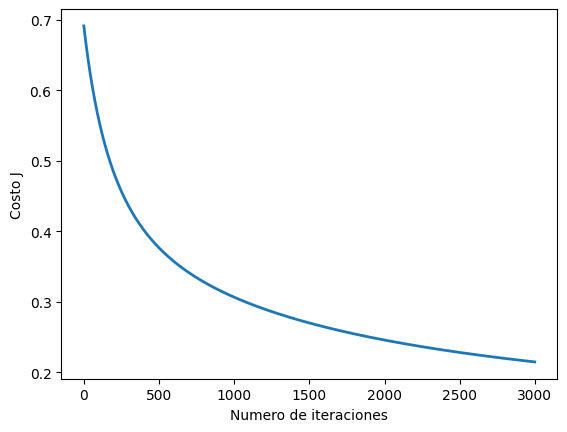

In [26]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.007
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si se presenta un incendio o no
X_array = [1, 1654733331,20.0,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [27]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [30]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('theta inicial (zeros): {:.3f}'.format(cost))
print('valor esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta inicial (zeros): 0.693
valor esperado (aproximado): 0.693

[-0.21462558  0.17585177  0.07401689 -0.18056766  0.09697655  0.04380724
 -0.04832358  0.15383585 -0.11280644  0.04992442  0.03834761  0.05785728
  0.03740429  0.02606025 -0.3042659 ]
Gradiente en theta inicial (zeros):
	[-0.2146, 0.1759, 0.0740, -0.1806, 0.0970, 0.0438, -0.0483, 0.1538, -0.1128, 0.0499, 0.0383, 0.0579, 0.0374, 0.0261, -0.3043]


In [31]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.21462558,  0.17585177,  0.07401689, -0.18056766,  0.09697655,  0.04380724,
 -0.04832358,  0.15383585, -0.11280644,  0.04992442,  0.03834761,  0.05785728,
  0.03740429,  0.02606025, -0.3042659])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[-0.21462558  0.17585177  0.07401689 -0.18056766  0.09697655  0.04380724
 -0.04832358  0.15383585 -0.11280644  0.04992442  0.03834761  0.05785728
  0.03740429  0.02606025 -0.3042659 ]
Costo en theta prueba: 1.028
Gradiente en theta prueba:
	[-0.272, 0.272, 0.110, -0.292, 0.156, 0.100, -0.089, 0.197, -0.216, 0.104, 0.086, 0.113, 0.084, 0.065, -0.423]


In [32]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

<ipython-input-32-4bfe3387cb04>:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,
<ipython-input-20-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


Costo con un valor de theta encontrado por optimize.minimize: 0.025
theta:
	[16.734, -0.806, -0.927, 2.119, -104.650, 3.475, 1.167, -7.822, -4.547, 2.779, 1.673, 25.777, 1.633, 1.150, 33.041]


In [33]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:7], y)

    if X.shape[1] <= 7:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [34]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [35]:
#  Predice la probabilidad de un incendio
prob = sigmoid(np.dot([1, 1654733331,20.0,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0], theta))
print('Para la deteccion de humo con los datos introducidos la probabilidad es de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para la deteccion de humo con los datos introducidos la probabilidad es de: 0.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 99.70 %
Precisión esperada (aproximadamente): 89.00 %


<ipython-input-20-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
